# KC House Data - Module 1 Project

## The Goal : Estimating house price using different features

The main stakeholder/customer for this project will be realtors and homebuyers in Kings County area.
Homebuyers have rough idea about the house requirements that they want, such as number of rooms, bathrooms, size of the living area, conditions, locations, renovations and etc. Realrtors will be able to give rough estimate of the house price to homebuyers with their requirements. This regression model will help both homebuyers and realtors for the house hunting and shorten the search.  



### Question #1. The reason for selecting house prices as topic.

The apsect of this project is estimating the price of the house. Since the file has many different features with large quanity of observed data, the topic of the project can be varried. But, the estimating price of houses with differnt features would be simple and the best way to help the most number of people. People already knows how to increase the house values, or which season to buy/sell the houses and etc. 



In [39]:
import pandas as pd                      #importing all the tools for developing regression model
import numpy as np
from matplotlib import pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

Since all the tools are ready to go, Let's create the dataframe by reading in the csv file and take a look.

In [40]:
df = pd.read_csv('kc_house_data.csv')  #reads the csv file
df.head()                              #quick peak at the data. It brings up first 5 columns.


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [41]:
df.info() #tells number of observed data within the file and the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Among the features, there're three different data types, integers, floats, and object.
To crunch numbers with python, object needs to be turned into numbers so that machine would understand it better.
Also, null values, Nan, or special caracters needs to be replaced with or dropped.

In [42]:
df.isna().sum() #looking for not a number within the features

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [43]:
df.date = pd.to_datetime(df['date'])          #changes object to datetime64 format.
df.sqft_basement = pd.to_numeric(df.sqft_basement) #changes object to float format.

print(df.info())

ValueError: Unable to parse string "?" at position 6

Looking at above error, it says that it's unable to change the sqft_basement into the 'float' because it contains '?' among the data. We have to do something about it. Let's see if there's anything else other than '?'Ca.

In [44]:
df.sqft_basement.unique() #Looking up all the unique data among the sqft_basement feature.

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

There's nothing really other than '?'for not a number.

### Question #2. What to do with the Nan, Special characters, or missing data

For those missing or special characters that are not actual observed data, the way to deal with them is simply dropping them or replacing them with mean of the features, 0, or leaving them blank without replacing. The down side of the replacing with a number would end up skewing or dirtying up the data. Dropping the data might not also be the best way to go because it will be less data to build up a model on. Leaving it blank would be the best option, but my coding didn't really work after all, so I decided to replace them with zero after examining the data.

In [45]:
df.sqft_basement = df.sqft_basement.map(lambda x: 0 if x == '?' else x) # Replace '?' with 0s
df.sqft_basement = df.sqft_basement.astype('float')                     #Then change the data type from object to 'float'

In [46]:
df.waterfront.unique() #Let's take a look at waterfront unique values since it has 2376 missing values

array([nan,  0.,  1.])

In [47]:
df.loc[df.waterfront.isna(), 'waterfront'] = 0 #Replacing Nan with 0
df.waterfront.unique()                         #Let's make sure it is 0s and 1s

array([0., 1.])

View, and yr_renovated are still left with many 'na'values. 
Views can be just replaced with 0 because there' only 63 out of 21597 data. It's only small amount
Let's replace 'na' with zero.

In [48]:
df.loc[df.view.isna(), 'view'] = 0 #N/A to Zero

In [49]:
df.loc[df.yr_renovated.isna(), 'yr_renovated'] = 0  #N/A to Zero for same reason
print(df.isna().sum())
df.info()                                          #Final check to see if there's Nan, Null and data types for features.

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft

Now, There're all kinds of errors with the data set, It would be good idea to check for duplicate datas.
Duplicates skews the data so it's never good to have. Checking duplicates with ID would be the best way to get it done, becasue ID should ditinguish all the sell datas from each other.

In [50]:
duplicates = df[df.duplicated(subset='id')] #checking for duplicate datas with house sell ID
print(len(duplicates))                      #printing number of duplicate Sells


177


In [51]:
df = df.drop_duplicates(subset='id', keep='first')   #Keeping the first ID and dropping the duplicate ones
df.info()
print(df.keys())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
id               21420 non-null int64
date             21420 non-null datetime64[ns]
price            21420 non-null float64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null float64
waterfront       21420 non-null float64
view             21420 non-null float64
condition        21420 non-null int64
grade            21420 non-null int64
sqft_above       21420 non-null int64
sqft_basement    21420 non-null float64
yr_built         21420 non-null int64
yr_renovated     21420 non-null float64
zipcode          21420 non-null int64
lat              21420 non-null float64
long             21420 non-null float64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 3.6

Those three features are getting turned in to integers, becuase it mighh cause some problem with regression or fitting the model later on.

In [52]:
df.sqft_basement = df.sqft_basement.astype(int) #changing features to integertype to avoid collision later on
df.view = df.view.astype(int)
df.waterfront = df.waterfront.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
id               21420 non-null int64
date             21420 non-null datetime64[ns]
price            21420 non-null float64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null float64
waterfront       21420 non-null int32
view             21420 non-null int32
condition        21420 non-null int64
grade            21420 non-null int64
sqft_above       21420 non-null int64
sqft_basement    21420 non-null int32
yr_built         21420 non-null int64
yr_renovated     21420 non-null float64
zipcode          21420 non-null int64
lat              21420 non-null float64
long             21420 non-null float64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
dtypes: datetime64[ns](1), float64(6), int32(3), int64(11)
memory usage:

Data is cleaned, and ready to be crunched/played with.
Running OLS Multi regression model with Raw, not transforemd or scaled data to get some feel for it.
It will be run with the intercept to have better fit.

In [53]:
x=df

x_cols = sm.add_constant(x) # adding intercept

outcome = 'price'                                                       #target is the price, dependant variable
x_cols = ['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living',            # Allthe features, independent variables
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',   # These features determines the change of the price.
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

predictors = '+'.join(x_cols)                                             
formula = outcome + "~" + predictors
model = smf.ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     131.0
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        22:39:20   Log-Likelihood:            -2.9173e+05
No. Observations:               21420   AIC:                         5.842e+05
Df Residuals:                   21030   BIC:                         5.873e+05
Df Model:                         389                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                 7.161e+06   2.96e+06      2.421      0.016    1.36e+06     1.3e+07
date[T.Timestamp('2014-05-03 00:00:00')]  1.759e+05   1.03e+05      1.702      0.089   -2.66e+04    3.78e+05
date[T.Timestamp('2014-05-04 00:00:00')]  -6.57e+04   9.31e+04     -0.706      0.480   -2.48e+05    1.17e+05
date[T.Timestamp('2014-05-05 00:00:00')]  1.644e+04   3.29e+04      0.500      0.617    -4.8e+04    8.09e+04
date[T.Timestamp('2014-05-06 00:00:00')]   -76.0774    3.3e+04     -0.002      0.998   -6.47e+04    6.46e+04
date[T.Timestamp('2014-05-07 00:00:00')]  1.447e+04   3.22e+04      0.450      0.653   -4.86e+04    7.75e+04
date[T.Timestamp('2014-05-08 00:00:00')]  4.854e+04   3.32e+04      1.464      0.143   -1.65e+04    1.14e+05
date[T.Timestamp('2014-05-09 00:00:00')] -1.487e+04   3.32e+04     -0.449      0.654   -7.99e+04    5.01e+04
date[T.Timestamp('2014-05-10 00:00:00')]  3.099e+04   9.31e+04      0.333      0.739   -1.51e+05    2.13e+05
date[T.Timestamp('2014-05-11 00:00:00')]   6.32e+04   1.44e+05      0.439      0.661   -2.19e+05    3.46e+05
date[T.Timestamp('2014-05-12 00:00:00')]  2.119e+04   3.33e+04      0.637      0.524    -4.4e+04    8.64e+04
date[T.Timestamp('2014-05-13 00:00:00')]  4.629e+04   3.27e+04      1.415      0.157   -1.79e+04     1.1e+05
date[T.Timestamp('2014-05-14 00:00:00')]  8205.3680   3.32e+04      0.248      0.805   -5.68e+04    7.32e+04
date[T.Timestamp('2014-05-15 00:00:00')]  7112.6525   3.31e+04      0.215      0.830   -5.77e+04    7.19e+04
date[T.Timestamp('2014-05-16 00:00:00')]  1478.6832    3.4e+04      0.044      0.965   -6.51e+04    6.81e+04
date[T.Timestamp('2014-05-17 00:00:00')]  8.321e+04   2.02e+05      0.411      0.681   -3.13e+05     4.8e+05
date[T.Timestamp('2014-05-18 00:00:00')]  1.914e+04   7.97e+04      0.240      0.810   -1.37e+05    1.75e+05
date[T.Timestamp('2014-05-19 00:00:00')]  1.399e+04    3.3e+04      0.424      0.671   -5.07e+04    7.86e+04
date[T.Timestamp('2014-05-20 00:00:00')]  1.362e+04   3.08e+04      0.442      0.658   -4.68e+04     7.4e+04
date[T.Timestamp('2014-05-21 00:00:00')]  9835.5938   3.21e+04      0.306      0.759   -5.31e+04    7.28e+04
date[T.Timestamp('2014-05-22 00:00:00')]  1.087e+04   3.23e+04      0.336      0.737   -5.25e+04    7.42e+04
date[T.Timestamp('2014-05-23 00:00:00')]  1.246e+04   3.29e+04      0.379      0.705    -5.2e+04    7.69e+04
date[T.Timestamp('2014-05-24 00:00:00')]  5.715e+04   6.53e+04      0.875      0.382   -7.09e+04    1.85e+05
date[T.Timestamp('2014-05-25 00:00:00')] -8.889e+04   9.31e+04     -0.955      0.340   -2.71e+05    9.35e+04
date[T.Timestamp('2014-05-26 00:00:00')] -1.635e+04   7.51e+04     -0.218      0.828   -1.64e+05    1.31e+05
date[T.Timestamp('2014-05-27 00

R sqaured value with 70.8%, Fstatic value with 131. 
Most of the P values for the 'date' feature is pretty high. I will choose to drop the date feature.
The Kaggel data set mentioned that the observations from 2014 & 2015. Date shouldn't have huge effect on the target.
Also, Id doesn't help either so it will also be dropped.

In [54]:
df.drop(['date'], axis=1, inplace=True) #dropping two features that doesn't help other than adding #s to R squred value.
df.drop(['id'], axis=1, inplace=True)

Let's see how dropping 'date' and 'id' column effected the over OLS model.

In [55]:
x=df

x_cols = sm.add_constant(x)

outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = smf.ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2779.
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        22:39:24   Log-Likelihood:            -2.9200e+05
No. Observations:               21420   AIC:                         5.840e+05
Df Residuals:                   21401   BIC:                         5.842e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.921e+06   2.95e+06      2.348      0.019    1.14e+06    1.27e+07
bedrooms      -3.621e+04   1913.794    -18.922      0.000      -4e+04   -3.25e+04
bathrooms      4.214e+04   3280.994     12.845      0.000    3.57e+04    4.86e+04
sqft_living     103.2918     18.098      5.707      0.000      67.817     138.766
sqft_lot          0.1264      0.048      2.633      0.008       0.032       0.221
floors         7301.3887   3613.670      2.020      0.043     218.325    1.44e+04
waterfront     6.174e+05   1.82e+04     33.989      0.000    5.82e+05    6.53e+05
view           5.342e+04   2131.418     25.063      0.000    4.92e+04    5.76e+04
condition      2.756e+04   2364.603     11.654      0.000    2.29e+04    3.22e+04
grade          9.734e+04   2171.910     44.819      0.000    9.31e+04    1.02e+05
sqft_above       77.4494     18.089      4.282      0.000      41.993     112.905
sqft_basement    47.6149     17.928      2.656      0.008      12.476      82.754
yr_built      -2629.6204     72.298    -36.372      0.000   -2771.329   -2487.911
yr_renovated     24.3272      3.994      6.090      0.000      16.498      32.156
zipcode        -586.8394     33.189    -17.682      0.000    -651.892    -521.787
lat            6.012e+05   1.08e+04     55.733      0.000     5.8e+05    6.22e+05
long           -2.17e+05   1.32e+04    -16.412      0.000   -2.43e+05   -1.91e+05
sqft_living15    20.9886      3.464      6.059      0.000      14.199      27.779
sqft_lot15       -0.3854      0.073     -5.244      0.000      -0.529      -0.241
==============================================================================
Omnibus:                    18196.191   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1818833.406
Skew:                           3.564   Prob(JB):                         0.00
Kurtosis:                      47.577   Cond. No.                     2.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R squared avlue went down to 0.7. It makes sense there're two less variables to be part of the multiple regression model.
Since the data cleaning is done, let's save the cleaned data into the picke so that it will be easier to create the duplicate cleaned data later on to test different methods to see what perfroms better for building the regression model.

In [56]:
import pickle            #saving cleared data into pickle to avoid to going back and duplicating.
with open ('data.pickle', 'wb') as clean_df:
    pickle.dump(df, clean_df, pickle.HIGHEST_PROTOCOL)

with open('data.pickle', 'rb') as clean_df:
    df1 = pickle.load(clean_df)
    df2 = df1


    
df1.info()
print(df1.keys())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 19 columns):
price            21420 non-null float64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null float64
waterfront       21420 non-null int32
view             21420 non-null int32
condition        21420 non-null int64
grade            21420 non-null int64
sqft_above       21420 non-null int64
sqft_basement    21420 non-null int32
yr_built         21420 non-null int64
yr_renovated     21420 non-null float64
zipcode          21420 non-null int64
lat              21420 non-null float64
long             21420 non-null float64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
dtypes: float64(6), int32(3), int64(10)
memory usage: 3.0 MB
Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront

### Question 3. How to decide what visualization to use?
Since we're coming up with the linear regression model, checking for liniearity assumptions is very important.
It doesn't have to be 100% following the assumptions, but it needs to be checked.
Scatter plot will be used to get the feeling of the raw data is linear or categorical. Scatter plots are the best way to check the liniearity because it plots every single observed data as points. Histogram will be used to check for the normality distribution of the data, because it will show the upside down U-shape for the distribution. Heat map will be used to check for the correlation. High-correlinearity can be easily distinguished by the color of the  blocks.  


We ran OLS model blindly above. Now it's time to take a closer look at the data we have and time to make a better model.
Visual graphs is good point to start to tkae a grasph.

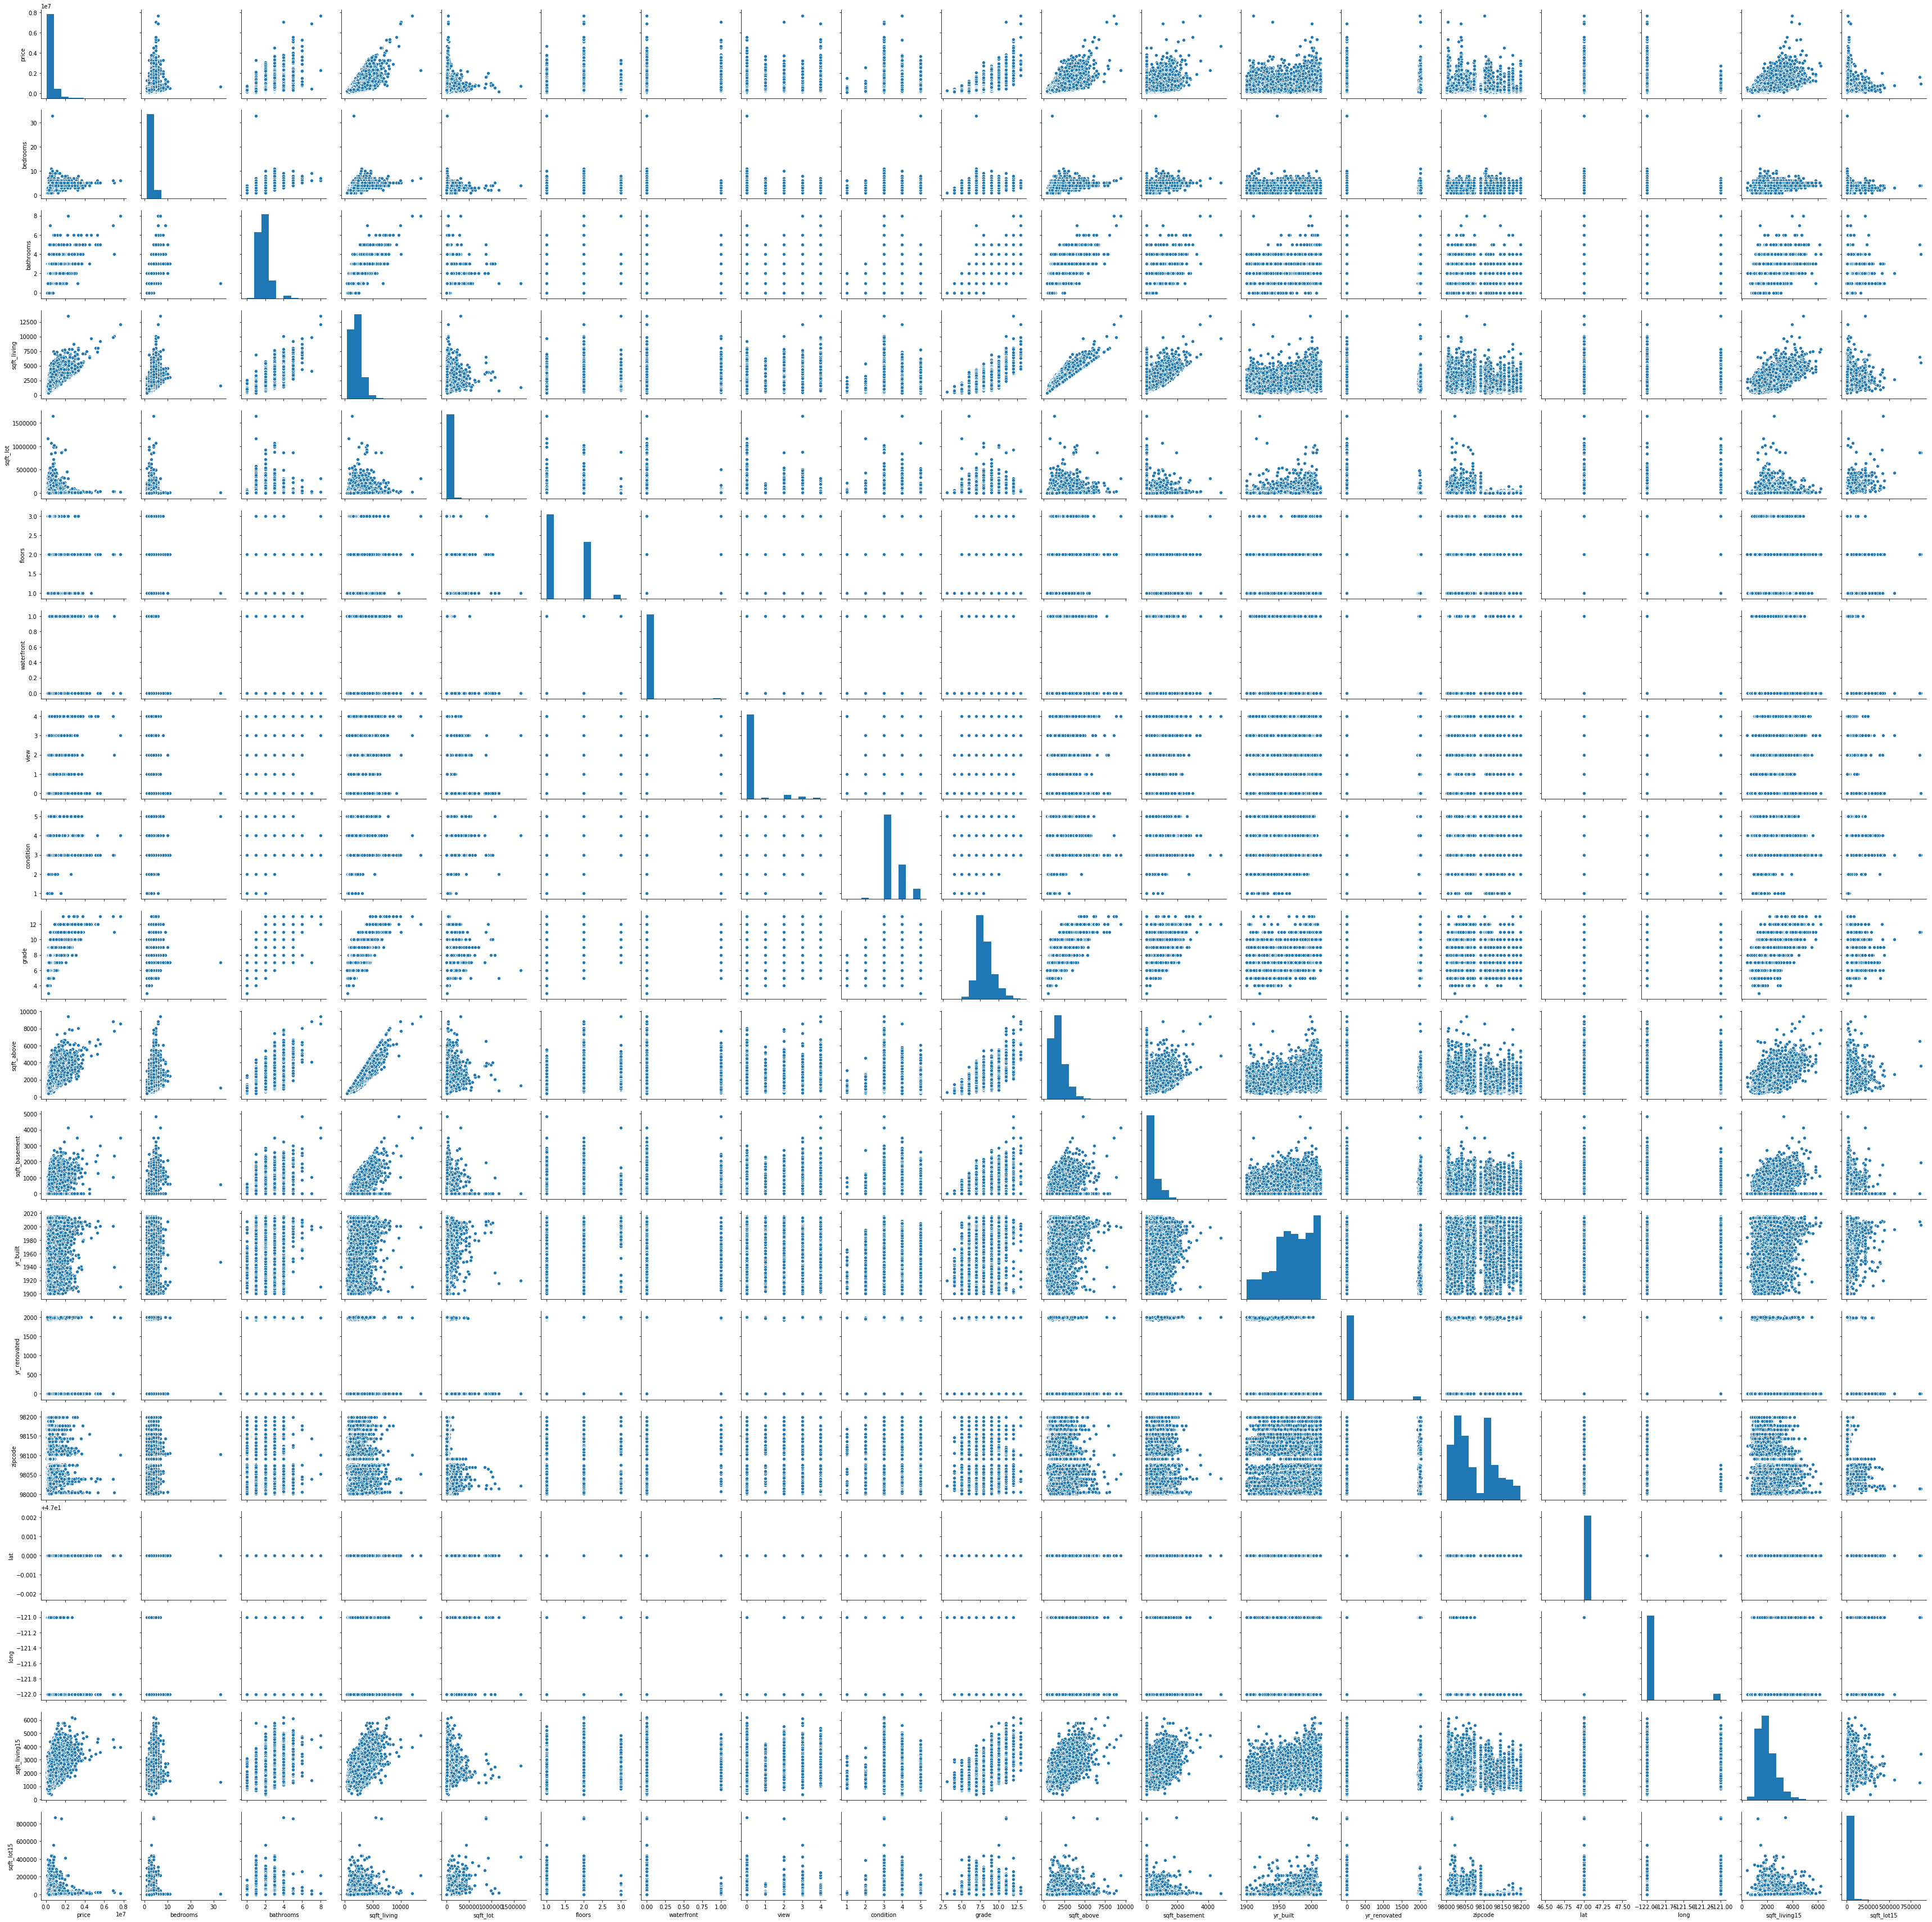

In [355]:
sns.pairplot(df1);

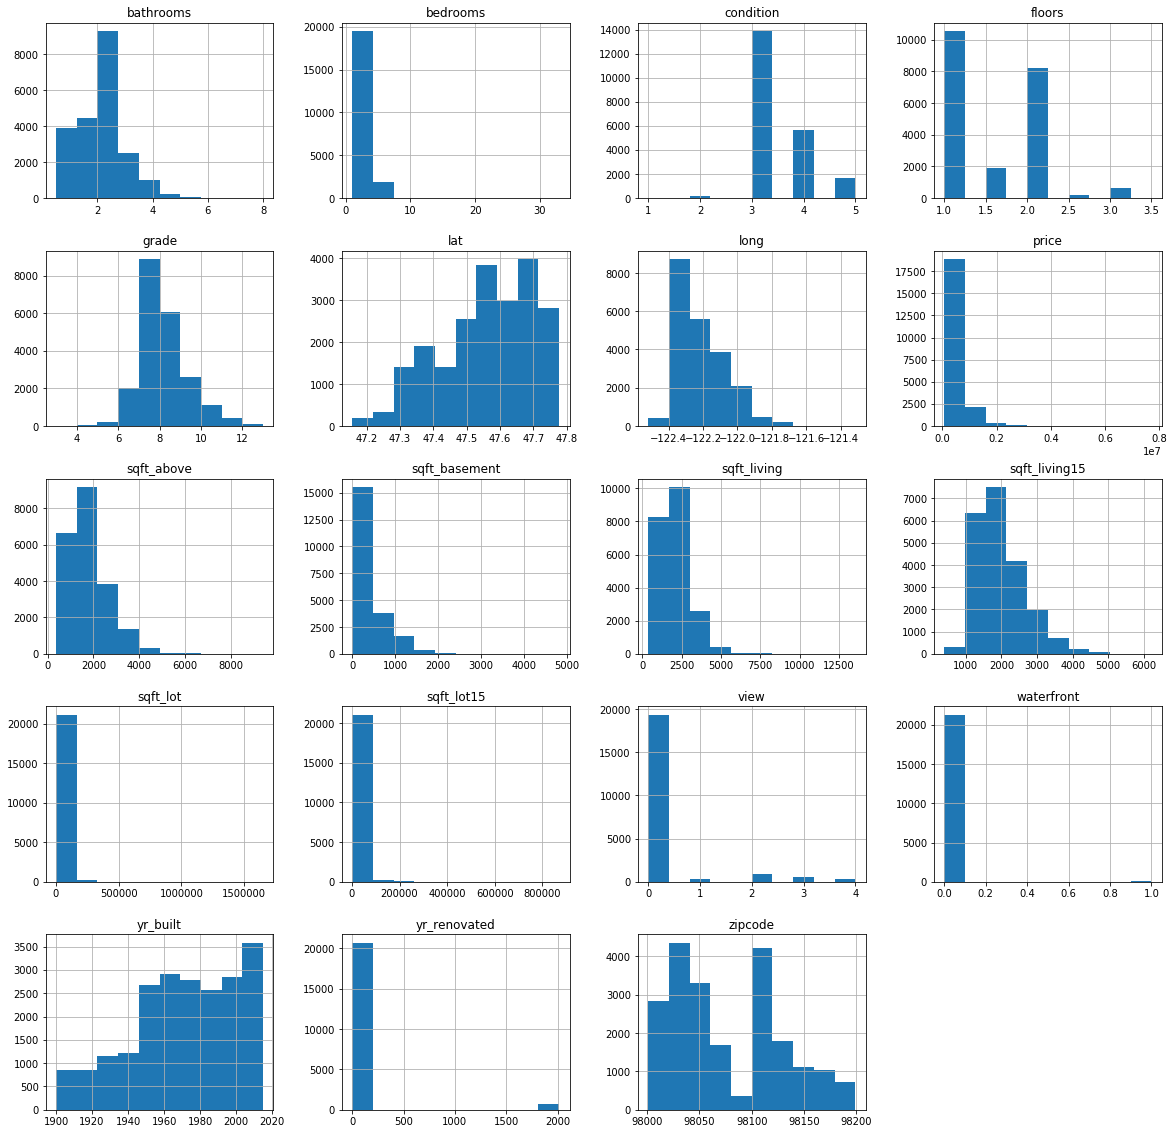

In [18]:
df1.hist(figsize=(20,20));

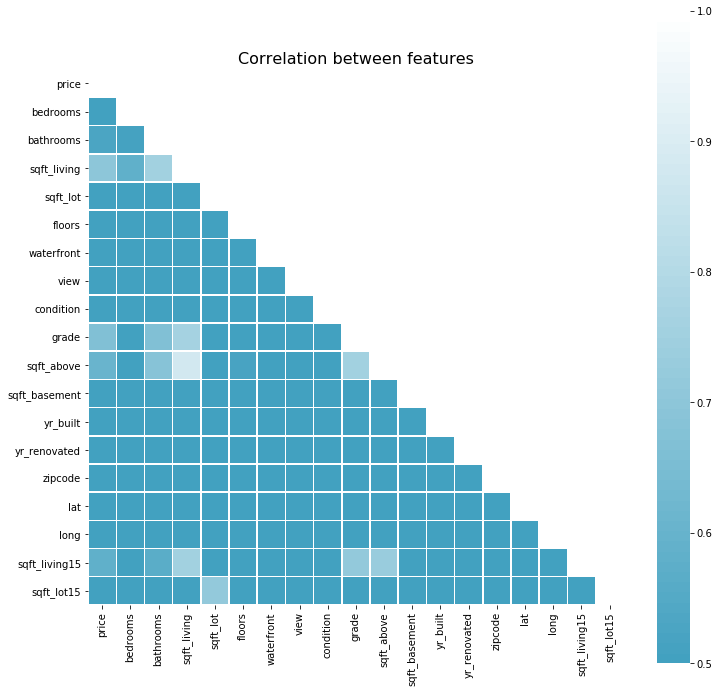

In [19]:
plt.figure(figsize=(12,12)) # Compute the correlation matrix
corr = df1.corr() # Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True # Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, center=0, vmin=0.5, square=True, linewidths=.5, cmap='ocean')
plt.title('Correlation between features', fontdict={'fontsize': 16})
plt.show()

Other than 'grade' feature, all the data look like not normally distributed. Continuous number type of features will be transforemed and scaled by boxcox or min-max method. Categorical values will be turend in to categoreis, and dumified.

In [57]:
df1.price = ( df1.price - min(df1.price) ) / ( max(df1.price) - min(df1.price) ) #Min-Max scaling for the price

                                    #Log transforamtion with feature with 0


df1.sqft_living, _ = stats.boxcox(df1.sqft_living)                             #Boxcox transforamtion for features without 0
df1.sqft_lot, _ = stats.boxcox(df1.sqft_lot)
df1.sqft_above, _ = stats.boxcox(df1.sqft_above)
df1.sqft_living15, _ = stats.boxcox(df1.sqft_living15)
df1.sqft_lot15, _ = stats.boxcox(df1.sqft_lot15)
df1.condition, _ = stats.boxcox(df1.condition)
df1.floors, _ = stats.boxcox(df1.floors)
df1.grade, _ = stats.boxcox(df1.grade)


C:\Users\Jun\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


C:\Users\Jun\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Jun\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.
C:\Users\Jun\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
C:\Users\Jun\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':


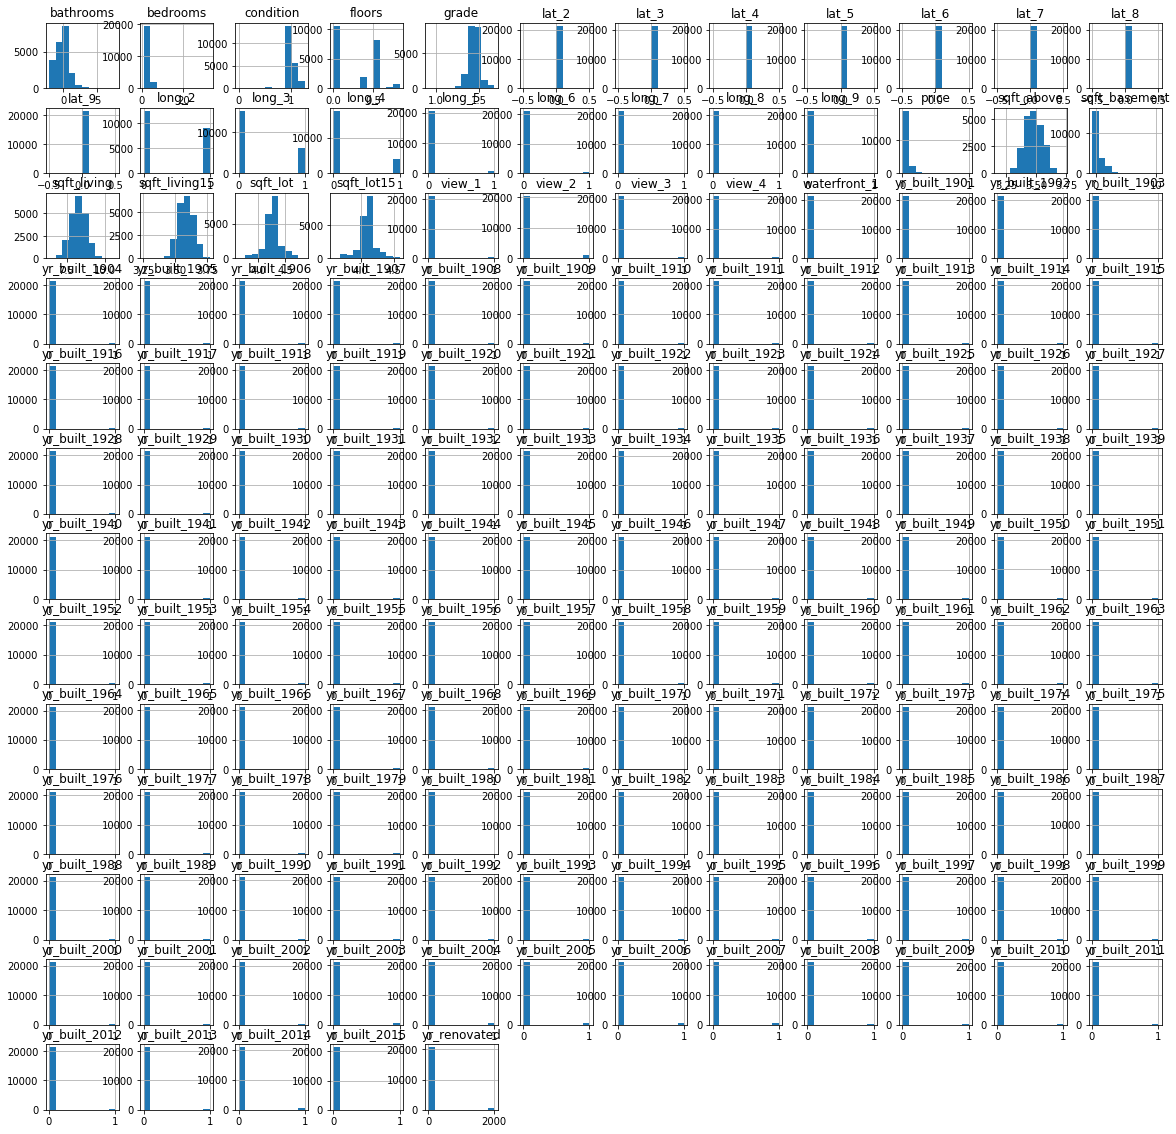

In [78]:


logbasement = np.log(df['sqft_basement'])   
logbathrooms = np.log(df1['bathrooms'])                              
logbasement = np.log(df1['sqft_basement'])

df1.bathrooms = (df1.bathrooms-np.mean(df1.bathrooms))/np.sqrt(np.var(df1.bathrooms))
df1.sqft_basement = (df1.sqft_basement-np.mean(df1.sqft_basement))/np.sqrt(np.var(df1.sqft_basement))
df1.sqft_bathrooms = (df1.bathrooms-np.mean(df1.bathrooms))/np.sqrt(np.var(df1.bathrooms))



df1.hist(figsize=(20,20));

Continous numercical features look way better than before. It has obvious upside U sahpe centered at the middle.

In [59]:
for col in ['view', 'waterfront','yr_built','zipcode']:
    df1[col] = df1[col].astype('category')

waterfront = pd.get_dummies(df1.waterfront, prefix='waterfront', drop_first=True)
view = pd.get_dummies(df1.view, prefix='view', drop_first=True)
zipcode = pd.get_dummies(df1.zipcode, prefix='zipcode', drop_first=True)
yr_built = pd.get_dummies(df1.yr_built, prefix='yr_built', drop_first=True)

df1 = df1.drop(['view', 'waterfront','yr_built','zipcode'], axis=1)
df1 = pd.concat([df1, waterfront, view, yr_built], axis=1)

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


Since there're so many different observed data for the latitudes, longitude, it will be turned in to categoreis and filled in to bins. Otherwise, there will be too many features created for those three.

In [60]:

segments = 10    #Creating 10 different bins for the latitude and longitude
bins = list(np.linspace(df1.long.min(), df1.long.max(), num=segments))
labels = [i for i in range(1,segments)]

# Hot encoding to latitude
df1.lat = pd.cut(df1.lat, bins, labels=labels)
df1.lat = df1.lat.astype('category')
lat = pd.get_dummies(df1.lat,prefix='lat', drop_first=True)

# Hot encoding to longtitude
df1.long = pd.cut(df1.long, bins, labels=labels)
df1.long = df1.long.astype('category')
long = pd.get_dummies(df1.long,prefix='long', drop_first=True)

# Adding dummies to dataset, removing original `lat` and `long` features
df1 = df1.join([lat, long])
df1.drop(['lat','long'], axis=1, inplace=True)

It's time to visually verify for the liniearity assumptions for continuous numercial features.

KC Housing DataSet - Regression Analysis and Diagnostics for formula: price ~bedrooms
-------------------------------------------------------------------------------------


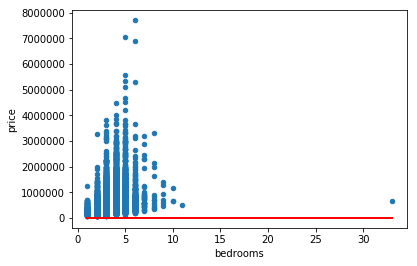

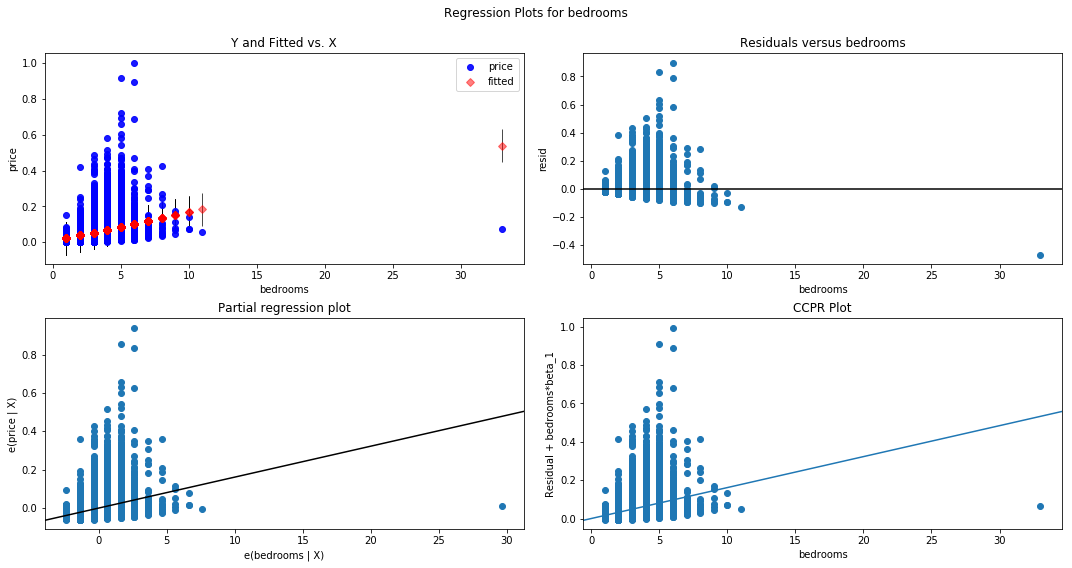

KC Housing DataSet - Regression Analysis and Diagnostics for formula: price ~bathrooms
-------------------------------------------------------------------------------------


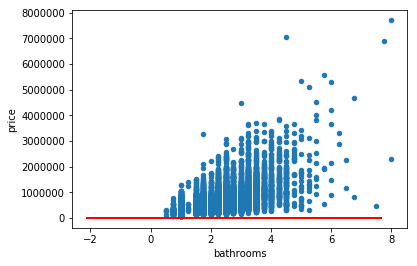

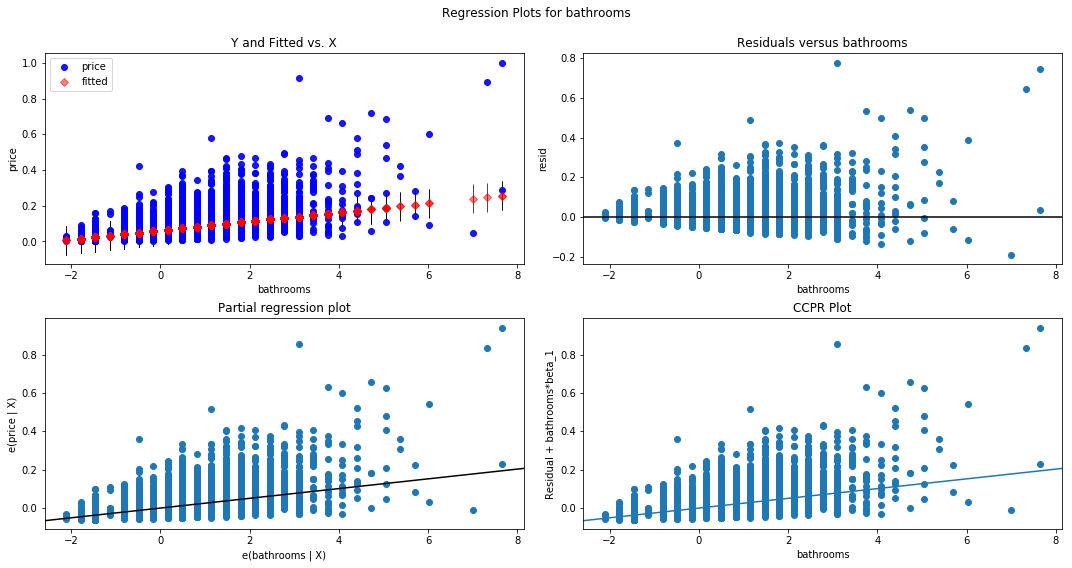

KC Housing DataSet - Regression Analysis and Diagnostics for formula: price ~sqft_living
-------------------------------------------------------------------------------------


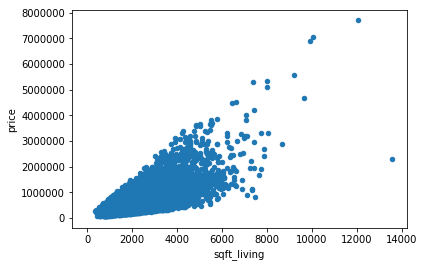

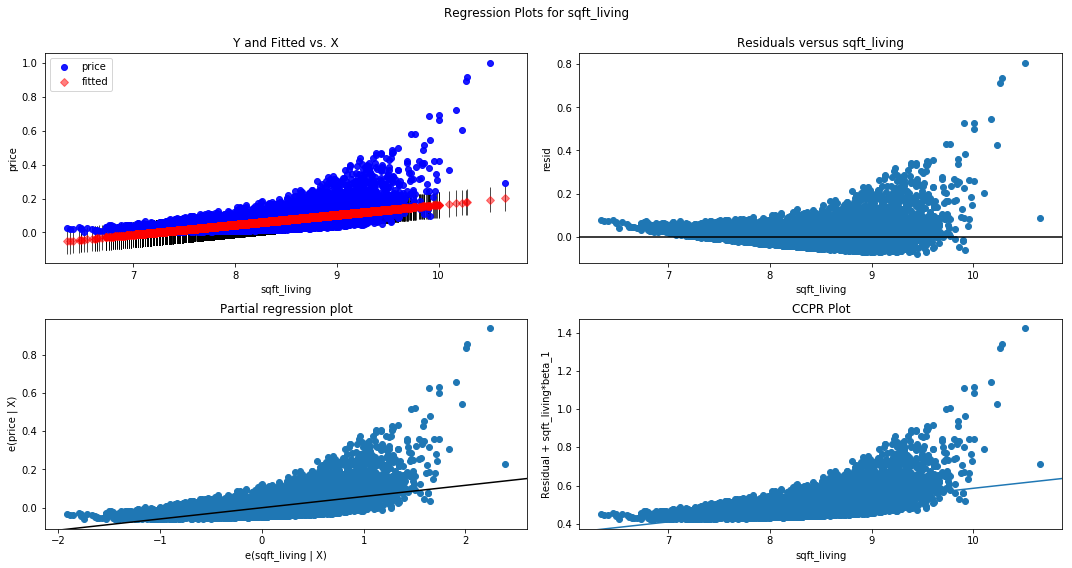

KC Housing DataSet - Regression Analysis and Diagnostics for formula: price ~sqft_lot
-------------------------------------------------------------------------------------


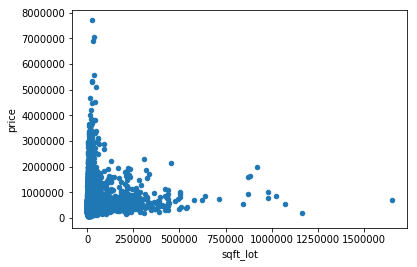

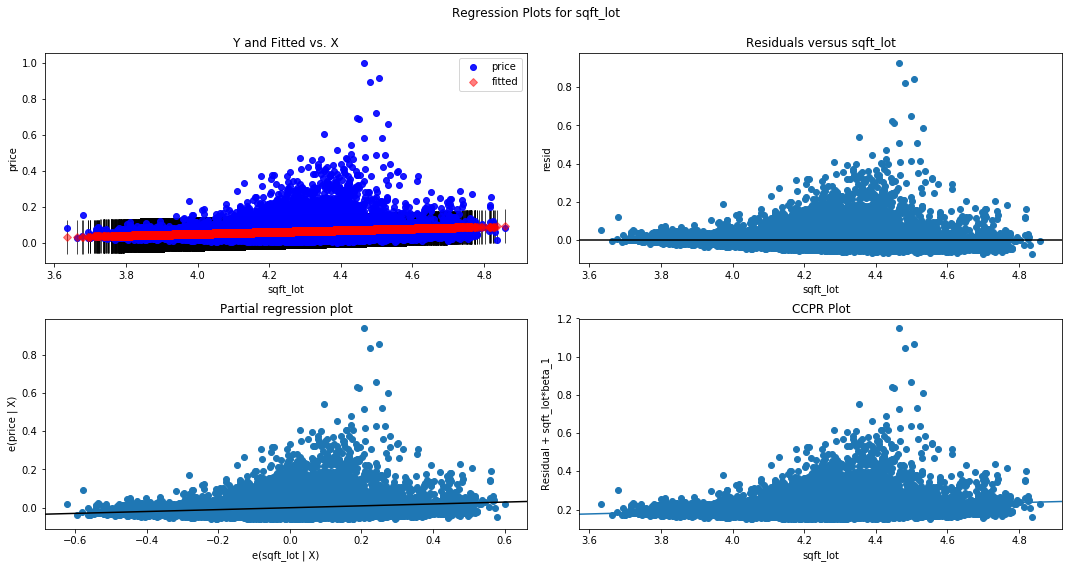

KC Housing DataSet - Regression Analysis and Diagnostics for formula: price ~floors
-------------------------------------------------------------------------------------


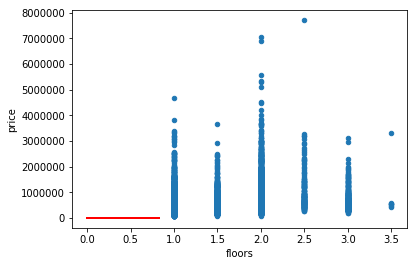

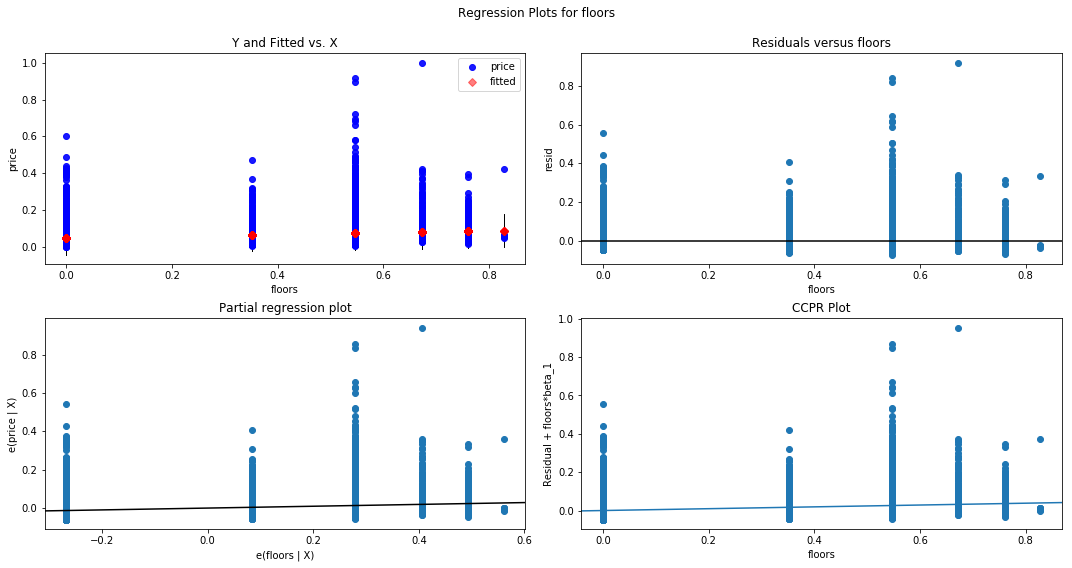

KC Housing DataSet - Regression Analysis and Diagnostics for formula: price ~condition
-------------------------------------------------------------------------------------


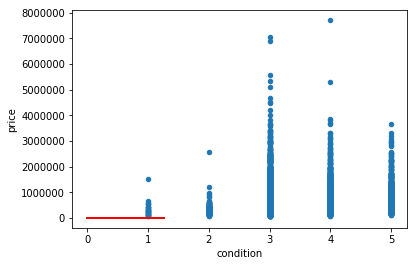

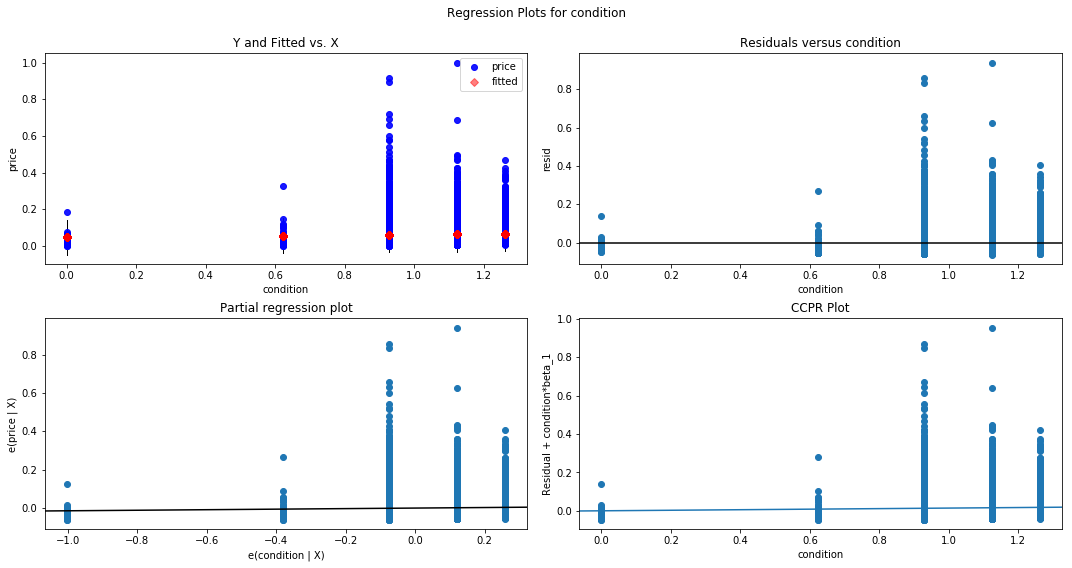

KC Housing DataSet - Regression Analysis and Diagnostics for formula: price ~grade
-------------------------------------------------------------------------------------


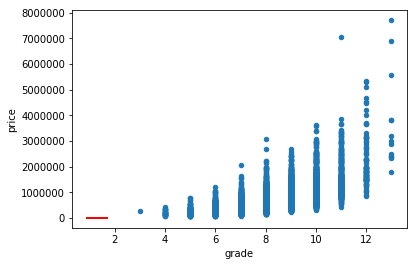

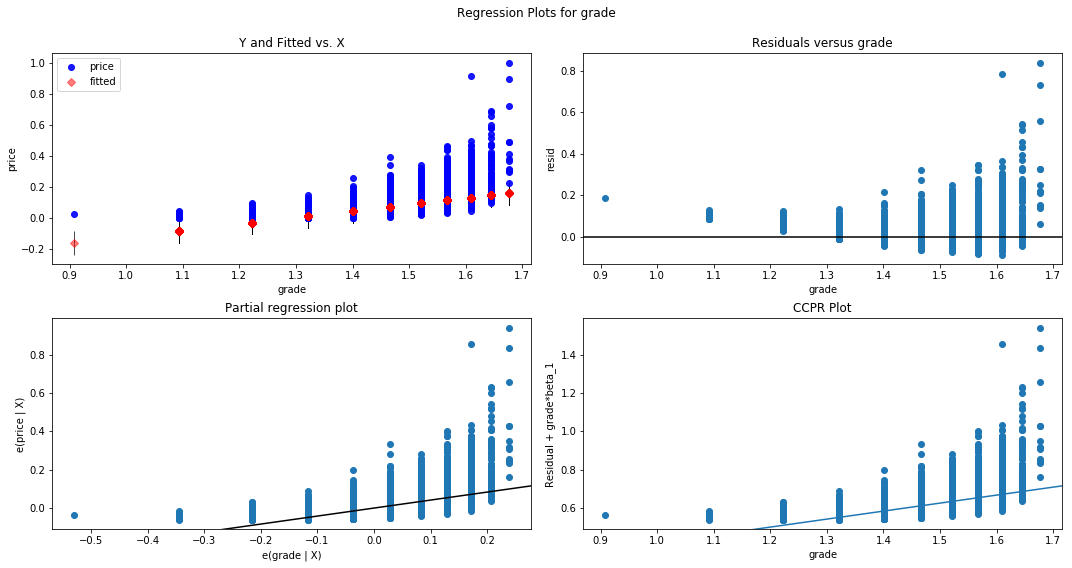

KC Housing DataSet - Regression Analysis and Diagnostics for formula: price ~sqft_above
-------------------------------------------------------------------------------------


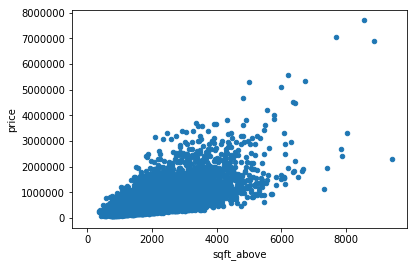

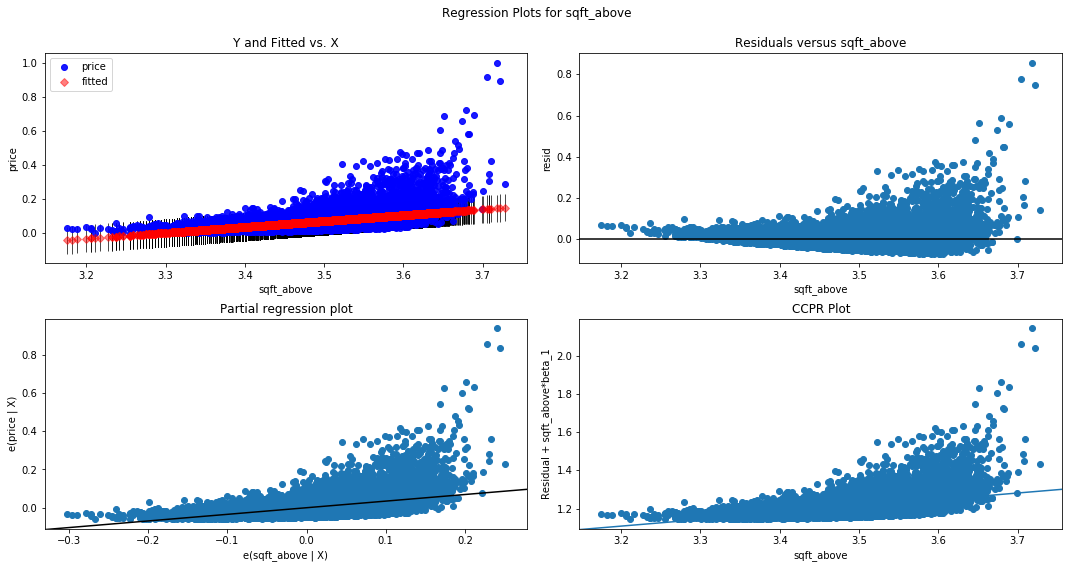

KC Housing DataSet - Regression Analysis and Diagnostics for formula: price ~sqft_basement
-------------------------------------------------------------------------------------


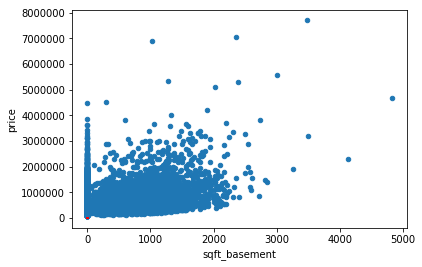

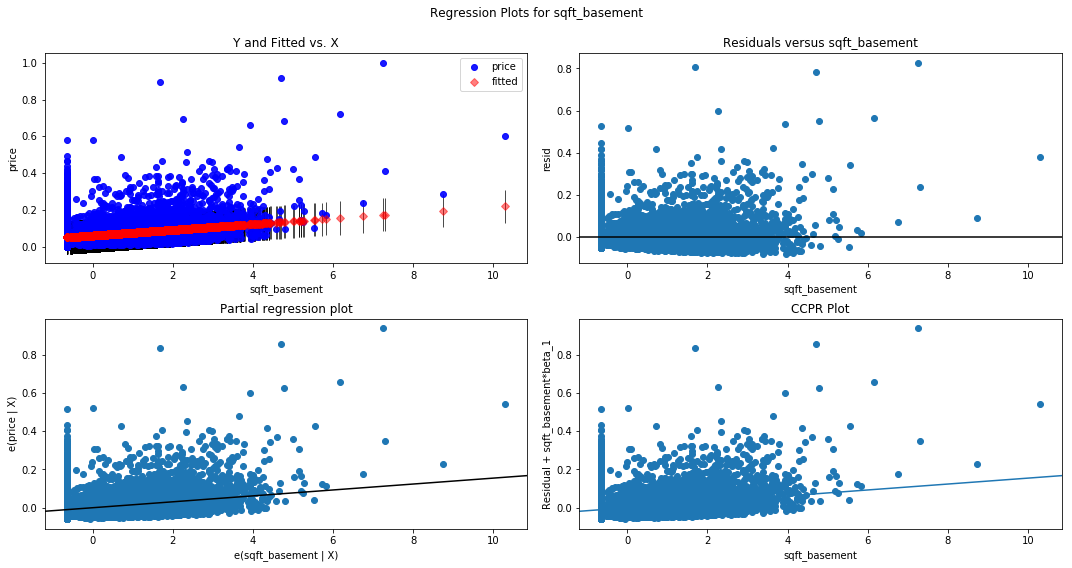

KC Housing DataSet - Regression Analysis and Diagnostics for formula: price ~yr_renovated
-------------------------------------------------------------------------------------


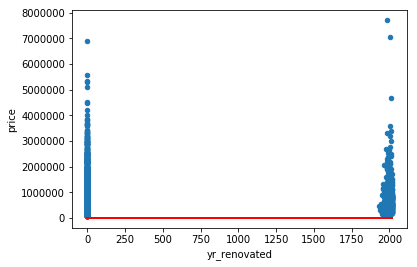

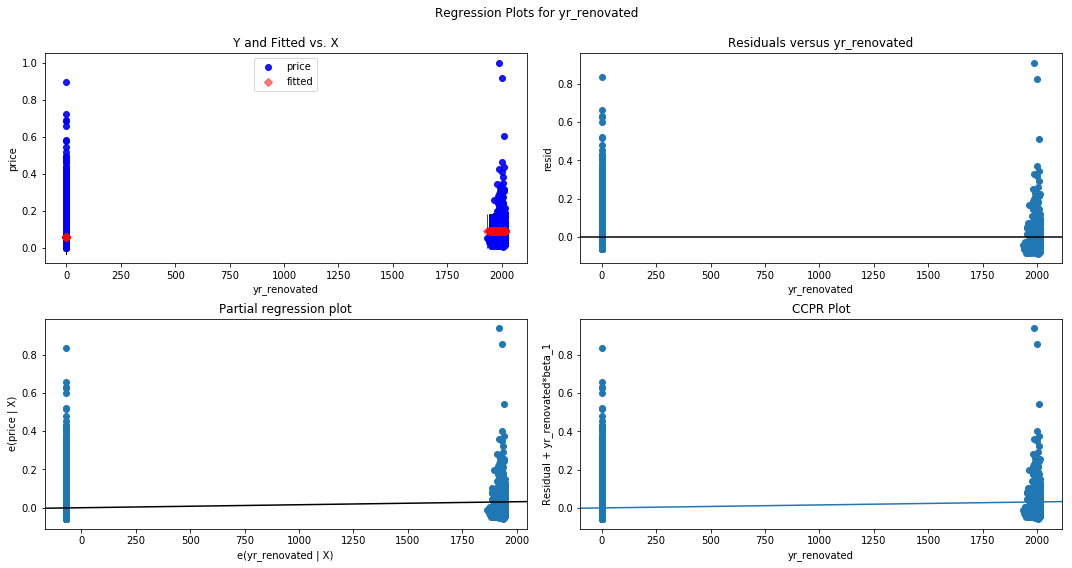

KC Housing DataSet - Regression Analysis and Diagnostics for formula: price ~sqft_living15
-------------------------------------------------------------------------------------


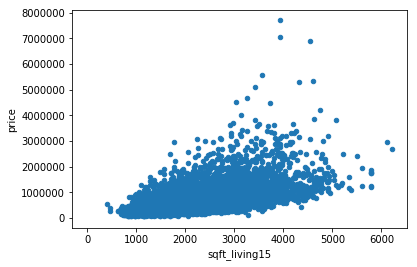

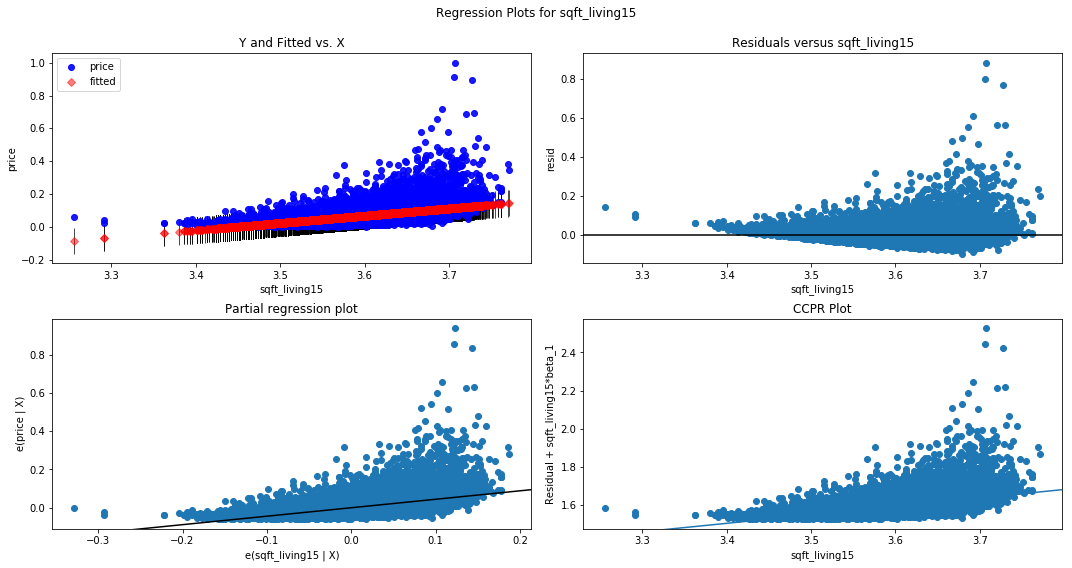

KC Housing DataSet - Regression Analysis and Diagnostics for formula: price ~sqft_lot15
-------------------------------------------------------------------------------------


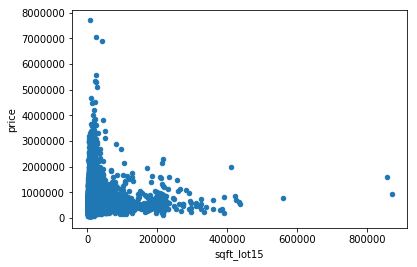

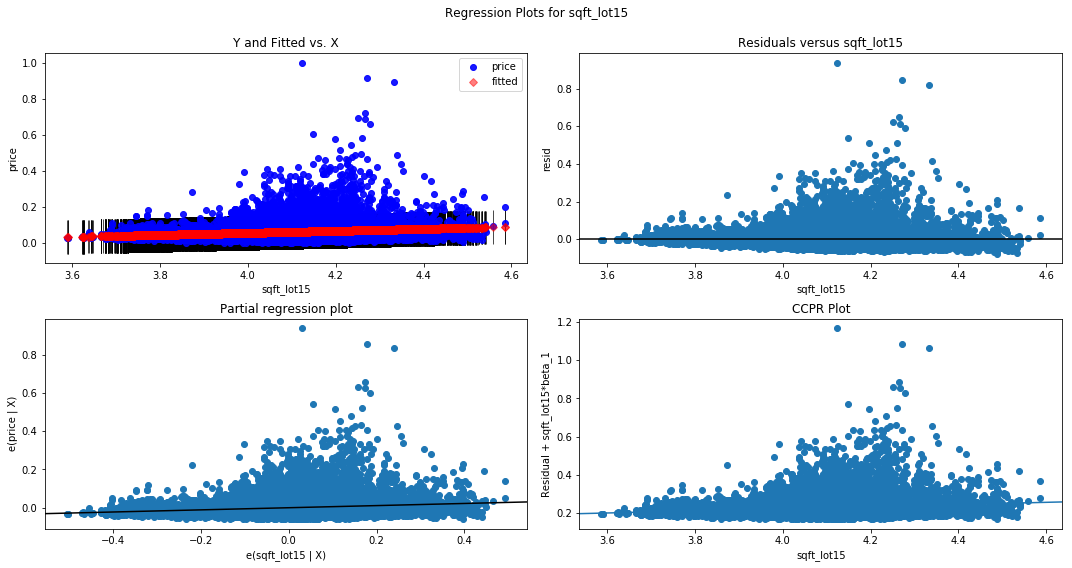

In [79]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms

results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ]]
for idx, val in enumerate(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'grade', 'sqft_above','sqft_basement', 'yr_renovated',
       'sqft_living15', 'sqft_lot15']):
    print ("KC Housing DataSet - Regression Analysis and Diagnostics for formula: price ~" + val)
    print ("-------------------------------------------------------------------------------------")

    f = 'price' + '~'+ val
#   
    model = smf.ols(formula=f, data=df1).fit()
    
    X_new = pd.DataFrame({val: [df1[val].min(), df1[val].max()]});
    preds = model.predict(X_new)
    df.plot(kind='scatter', x=val, y='price');
    plt.plot(X_new, preds, c='red', linewidth=2);
    plt.show()
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
    plt.show()
    
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0] ])
    #input("Press Enter to continue...")

price QQ-plot
bedrooms QQ-plot
bathrooms QQ-plot
sqft_living QQ-plot
sqft_lot QQ-plot
floors QQ-plot
condition QQ-plot
grade QQ-plot
sqft_above QQ-plot
sqft_basement QQ-plot
yr_renovated QQ-plot
sqft_living15 QQ-plot
sqft_lot15 QQ-plot


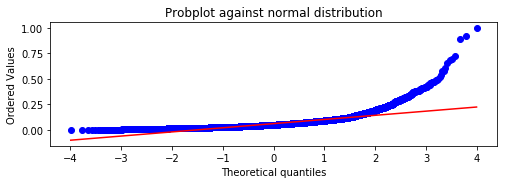

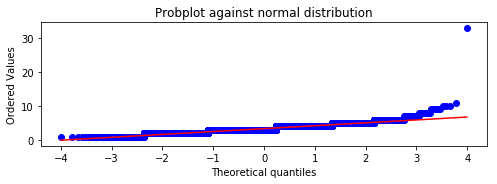

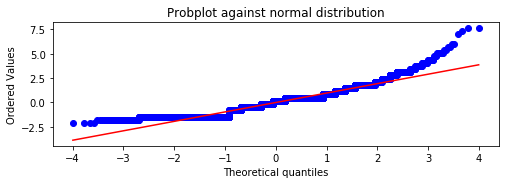

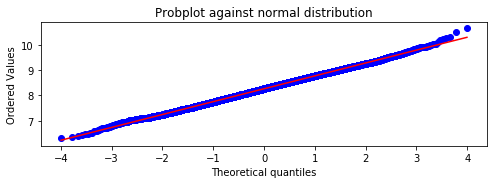

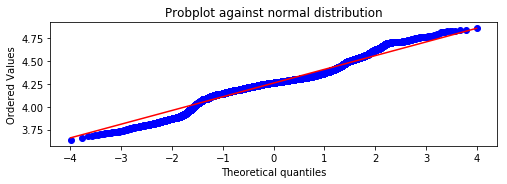

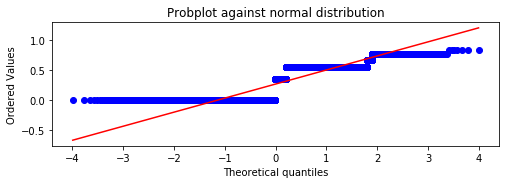

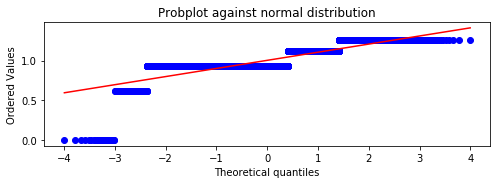

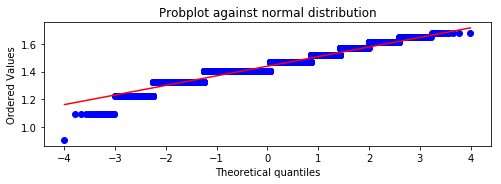

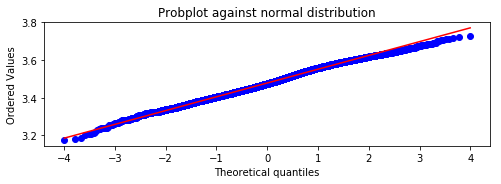

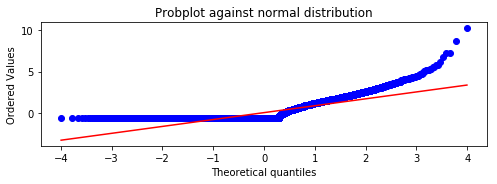

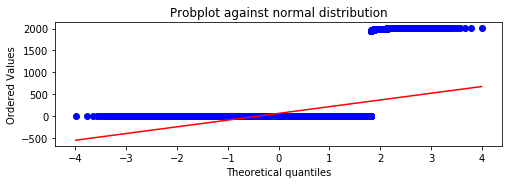

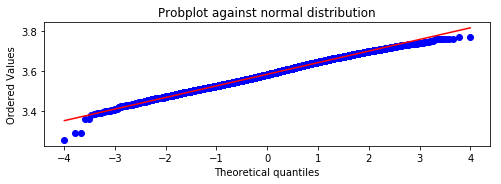

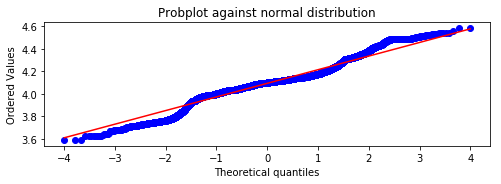

In [80]:
from scipy import stats

for x in ['price','bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_renovated', 
          'sqft_living15', 'sqft_lot15']:
    print(x, 'QQ-plot')
    fig = plt.figure(figsize=(8, 5))
    ax1 = fig.add_subplot(211)
    x = df1[x]
    prob = stats.probplot(x, dist=stats.norm, plot=ax1)
    ax1.set_title('Probplot against normal distribution')

Not all the graph shows clear linear relationship, most of them look linear.
Q-Q plot looks pretty straight, proving the normally distributed data.
Some of the residual plot shows heteroscedasticity.


### Question #4. How to select features

I'm going to use step-wise selection to choose what to include for features. p-values greater than 0.05 will be dropped since it is not statistically significant.

In [63]:
import statsmodels.api as sm




X = df1.drop(['price'],axis=1)
y= y = df1.price


def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

C:\Users\Jun\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\Jun\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Jun\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Jun\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Add  sqft_living                    with p-value 0.0
Add  grade                          with p-value 0.0
Add  view_4                         with p-value 0.0
Add  waterfront_1                   with p-value 1.3935e-117
Add  sqft_basement                  with p-value 4.0691e-116
Add  view_3                         with p-value 1.12182e-56
Add  yr_renovated                   with p-value 5.97295e-51
Add  condition                      with p-value 1.07528e-57
Add  sqft_above                     with p-value 3.46878e-41
Add  long_4                         with p-value 1.18009e-43
Add  sqft_living15                  with p-value 4.76875e-40
Add  view_2                         with p-value 1.84265e-30
Add  bathrooms                      with p-value 1.21228e-24
Add  view_1                         with p-value 5.16359e-24
Add  yr_built_1978                  with p-value 1.29717e-20
Add  yr_built_1979                  with p-value 5.88552e-19
Add  yr_built_1906                  with p-value

C:\Users\Jun\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:52: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Add  yr_built_1962                  with p-value 0.000563625
Drop long_4                         with p-value 0.0523163
Add  yr_built_2002                  with p-value 0.00158617
Add  yr_built_1991                  with p-value 0.00125
Add  yr_built_1988                  with p-value 0.000900802
Add  yr_built_1997                  with p-value 0.00230976
Add  yr_built_2005                  with p-value 0.00426243
Add  yr_built_2003                  with p-value 0.00330528
Add  yr_built_2004                  with p-value 0.00265565
Add  yr_built_2011                  with p-value 0.0032241
Drop floors                         with p-value 0.0689209
Add  yr_built_2006                  with p-value 0.00225621
Add  yr_built_1985                  with p-value 0.00477771
Add  yr_built_1995                  with p-value 0.00408599
Add  yr_built_1996                  with p-value 0.00378442
Add  yr_built_1999                  with p-value 0.00437913
resulting features:
['sqft_living', 'grade',

Three features turned out to have p-values greater than 0.05.
They will be dropped from the dataframe.

In [24]:
df1 = df1.drop(['yr_renovated'],axis=1)
df1 = df1.drop(['long_4'],axis=1)
df1 = df1.drop(['floors'],axis=1)

Now all we have to do is building the regression model with the transformed, and selected features.

In [64]:
x=df1

x_cols = sm.add_constant(x)
outcome = 'price'

x_cols = ['sqft_living', 'grade', 'view_4', 'waterfront_1', 
          'sqft_basement', 'view_3', 'condition', 'sqft_above', 
          'sqft_living15', 'view_2', 'bathrooms', 'view_1', 
          'yr_built_1978', 'yr_built_1979', 'yr_built_1906', 
          'yr_built_1910', 'long_5', 'bedrooms', 'yr_built_1926', 
          'yr_built_1990', 'yr_built_1924', 'yr_built_1905', 
          'yr_built_1977', 'yr_built_1909', 'yr_built_1918', 
          'yr_built_1927', 'yr_built_1942', 'yr_built_1925', 
          'yr_built_1940', 'yr_built_1923', 'yr_built_1941', 
          'yr_built_1916', 'yr_built_1907', 'yr_built_1947', 
          'yr_built_1922', 'yr_built_1945', 'yr_built_1951', 
          'yr_built_1928', 'yr_built_1920', 'yr_built_1946', 
          'yr_built_1949', 'yr_built_1950', 'yr_built_1943', 
          'yr_built_1911', 'yr_built_1912', 'yr_built_1944', 
          'yr_built_1939', 'yr_built_1904', 'yr_built_1919', 
          'yr_built_1921', 'yr_built_1952', 'yr_built_1914', 
          'yr_built_1948', 'yr_built_1953', 'yr_built_1908', 
          'yr_built_1915', 'yr_built_1930', 'yr_built_1929', 
          'long_2', 'yr_built_1954', 'yr_built_1931', 'yr_built_1917', 
          'yr_built_1937', 'yr_built_1913', 'yr_built_1903', 
          'yr_built_1936', 'yr_built_1933', 'yr_built_1901', 
          'yr_built_1938', 'yr_built_1955', 'yr_built_1902', 
          'yr_built_1932', 'yr_built_1994', 'yr_built_2008', 
          'yr_built_1935', 'yr_built_1959', 'yr_built_1998', 
          'yr_built_1989', 'yr_built_1958', 'yr_built_1956', 
          'long_3', 'yr_built_1934', 'yr_built_1993', 
          'yr_built_1992', 'yr_built_2012', 'yr_built_1987', 
          'yr_built_1986', 'yr_built_1969', 'yr_built_1957', 
          'yr_built_1961', 'yr_built_1963', 'yr_built_1960', 
          'yr_built_1962', 'yr_built_2002', 'yr_built_1991', 
          'yr_built_1988', 'yr_built_1997', 'yr_built_2005', 
          'yr_built_2003', 'yr_built_2004', 'yr_built_2011', 
          'yr_built_2006', 'yr_built_1985', 'yr_built_1995', 
          'yr_built_1996', 'yr_built_1999']





predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = smf.ols(formula=formula, data=df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     319.1
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        22:53:26   Log-Likelihood:                 44709.
No. Observations:               21420   AIC:                        -8.920e+04
Df Residuals:                   21313   BIC:                        -8.835e+04
Df Model:                         106                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.2266      0.034    -36.551      0.000      -1.292      -1.161
sqft_living      -0.0162      0.002     -7.698      0.000      -0.020      -0.012
grade             0.2819      0.005     57.103      0.000       0.272       0.292
view_4            0.0430      0.002     20.046      0.000       0.039       0.047
waterfront_1      0.0719      0.003     23.491      0.000       0.066       0.078
sqft_basement     0.0101      0.001     19.349      0.000       0.009       0.011
view_3            0.0161      0.001     11.417      0.000       0.013       0.019
condition         0.0113      0.002      6.250      0.000       0.008       0.015
sqft_above        0.2112      0.013     16.545      0.000       0.186       0.236
sqft_living15     0.0755      0.006     12.899      0.000       0.064       0.087
view_2            0.0085      0.001      8.226      0.000       0.006       0.010
bathrooms         0.0096      0.000     26.938      0.000       0.009       0.010
view_1            0.0131      0.002      7.680      0.000       0.010       0.016
yr_built_1978    -0.0098      0.002     -6.138      0.000      -0.013      -0.007
yr_built_1979    -0.0098      0.002     -5.781      0.000      -0.013      -0.006
yr_built_1906     0.0455      0.003     14.224      0.000       0.039       0.052
yr_built_1910     0.0417      0.003     15.606      0.000       0.036       0.047
long_5           -0.0024      0.001     -2.082      0.037      -0.005      -0.000
bedrooms         -0.0030      0.000    -10.071      0.000      -0.004      -0.002
yr_built_1926     0.0375      0.002     16.109      0.000       0.033       0.042
yr_built_1990    -0.0156      0.002     -8.894      0.000      -0.019      -0.012
yr_built_1924     0.0400      0.003     15.310      0.000       0.035       0.045
yr_built_1905     0.0457      0.004     12.913      0.000       0.039       0.053
yr_built_1977    -0.0051      0.002     -3.316      0.001      -0.008      -0.002
yr_built_1909     0.0402      0.003     12.755      0.000       0.034       0.046
yr_built_1918     0.0386      0.003     13.753      0.000       0.033       0.044
yr_built_1927     0.0364      0.003     12.761      0.000       0.031       0.042
yr_built_1942     0.0339      0.002     16.055      0.000       0.030       0.038
yr_built_1925     0.0342      0.002     14.146      0.000       0.029       0.039
yr_built_1940     0.0330      0.002     13.206      0.000       0.028       0.038
yr_built_1923     0.0416      0.003     12.409      0.000       0.035       0.048
yr_built_1941     0.0333      0.002     13.675      0.000       0.029       0.038
yr_built_1916     0.0397      0.003     11.575      0.000       0.033       0.046
yr_built_1907     0.0414      0.004     10.984      0.000       0.034       0.049
yr_built_1947     0.0288      0.002     14.801   

### Question #5. Result Interpretation

R squared and R adjusted sqaure value turned out to be 0.613 and 0.612, a lot lower than what I expected.
F-static value is 319.1, which means the model is not the result of random possibilities.
Lower AIC means a model is considered to be closer to the truth. Lower BIC also means that a model is considered to be more likely to be the true model. 


Prediction was made with the model, so It's time to make a evaluation.
To evalute the model, we just have to compare predicted values with the actual values.
The difference between two values is the residuals. Smaller the residual value is, the better the model.

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


X = df1.drop(['price'],axis=1)
y= y = df1.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print(len(X_train), len(X_test), len(y_train), len(y_test))

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test


train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)
print('Difference between Test and Train', test_mse-train_mse)

14994 6426 14994 6426
Train Mean Squarred Error: 0.0009026501648813446
Test Mean Squarred Error: 0.0008783132979877068
Difference between Test and Train -2.433686689363784e-05


There is only 0.000243 difference between the trained and tested model. The model is well fitted despite 0.61 R squared value.

Cross validation will be peformed for the last step to verify the accuracy of the model. K-Fold Cross Valdiation was used.

In [69]:
X = df1.drop(['price'],axis=1)
y= y = df1.price
#significant_features = feature_selection(X, y)

# This is set of function for performing linear regression and validating results
def linear_regression(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)


def cross_validation(X, y, cv=15, show_scores=False):
    score = cross_val_score(linreg, X, y, cv=cv, scoring="r2")
    print('Model Accuracy:',round(sum(score)/len(score),2)*100, '%')
    print(score) if show_scores else False
    


print(cross_validation(X, y, cv=15, show_scores=True))
print(cross_validation(X, y, cv=5, show_scores=True))

Model Accuracy: 61.0 %
[0.62304044 0.64132981 0.57600985 0.60272126 0.64972969 0.57382779
 0.56354524 0.64135563 0.61723553 0.61733484 0.6542989  0.61377352
 0.61732019 0.55543342 0.59053635]
None
Model Accuracy: 60.0 %
[0.60900552 0.60430652 0.60700213 0.62787118 0.57265525]
None


The model accuracy is 61% by folding 15 times, and 60% with the 5 times.
It's not so accurate so better scaling and transforming features will be needed.